In [1]:
import numpy as np
import pandas as pd
import pathlib
import os
from tqdm import tqdm
import cv2

In [2]:
dir="C:/Users/DELL/Pictures/project"
data =pathlib.Path(dir)

In [3]:
print(os.listdir(dir))

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [7]:
def assign_label(img,type ):
    return type

In [8]:
def train_data(type, dir):
    for i in tqdm(os.listdir(dir)):
       label=assign_label(i,type)
       #path = os.path.join(dir,i)
       img = cv2.imread(os.path.join(dir,i))
       img = cv2.resize(img, (64,64))
        
       x.append(np.array(img))
       A.append(str(label))

In [9]:
train_data("Anthracnose",Anthracnose)
train_data("BacterialCanker",BacterialCanker)
train_data("CuttingWeevil",CuttingWeevil)
train_data("DieBack",DieBack)
train_data("GallMidge",GallMidge)
train_data("Healthy",Healthy)
train_data("powderyMildew",powderyMildew)
train_data("SootyMould",SootyMould)
len(x)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 889.18it/s]


4000

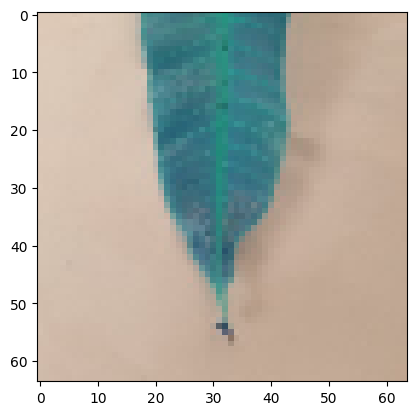

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x[0])

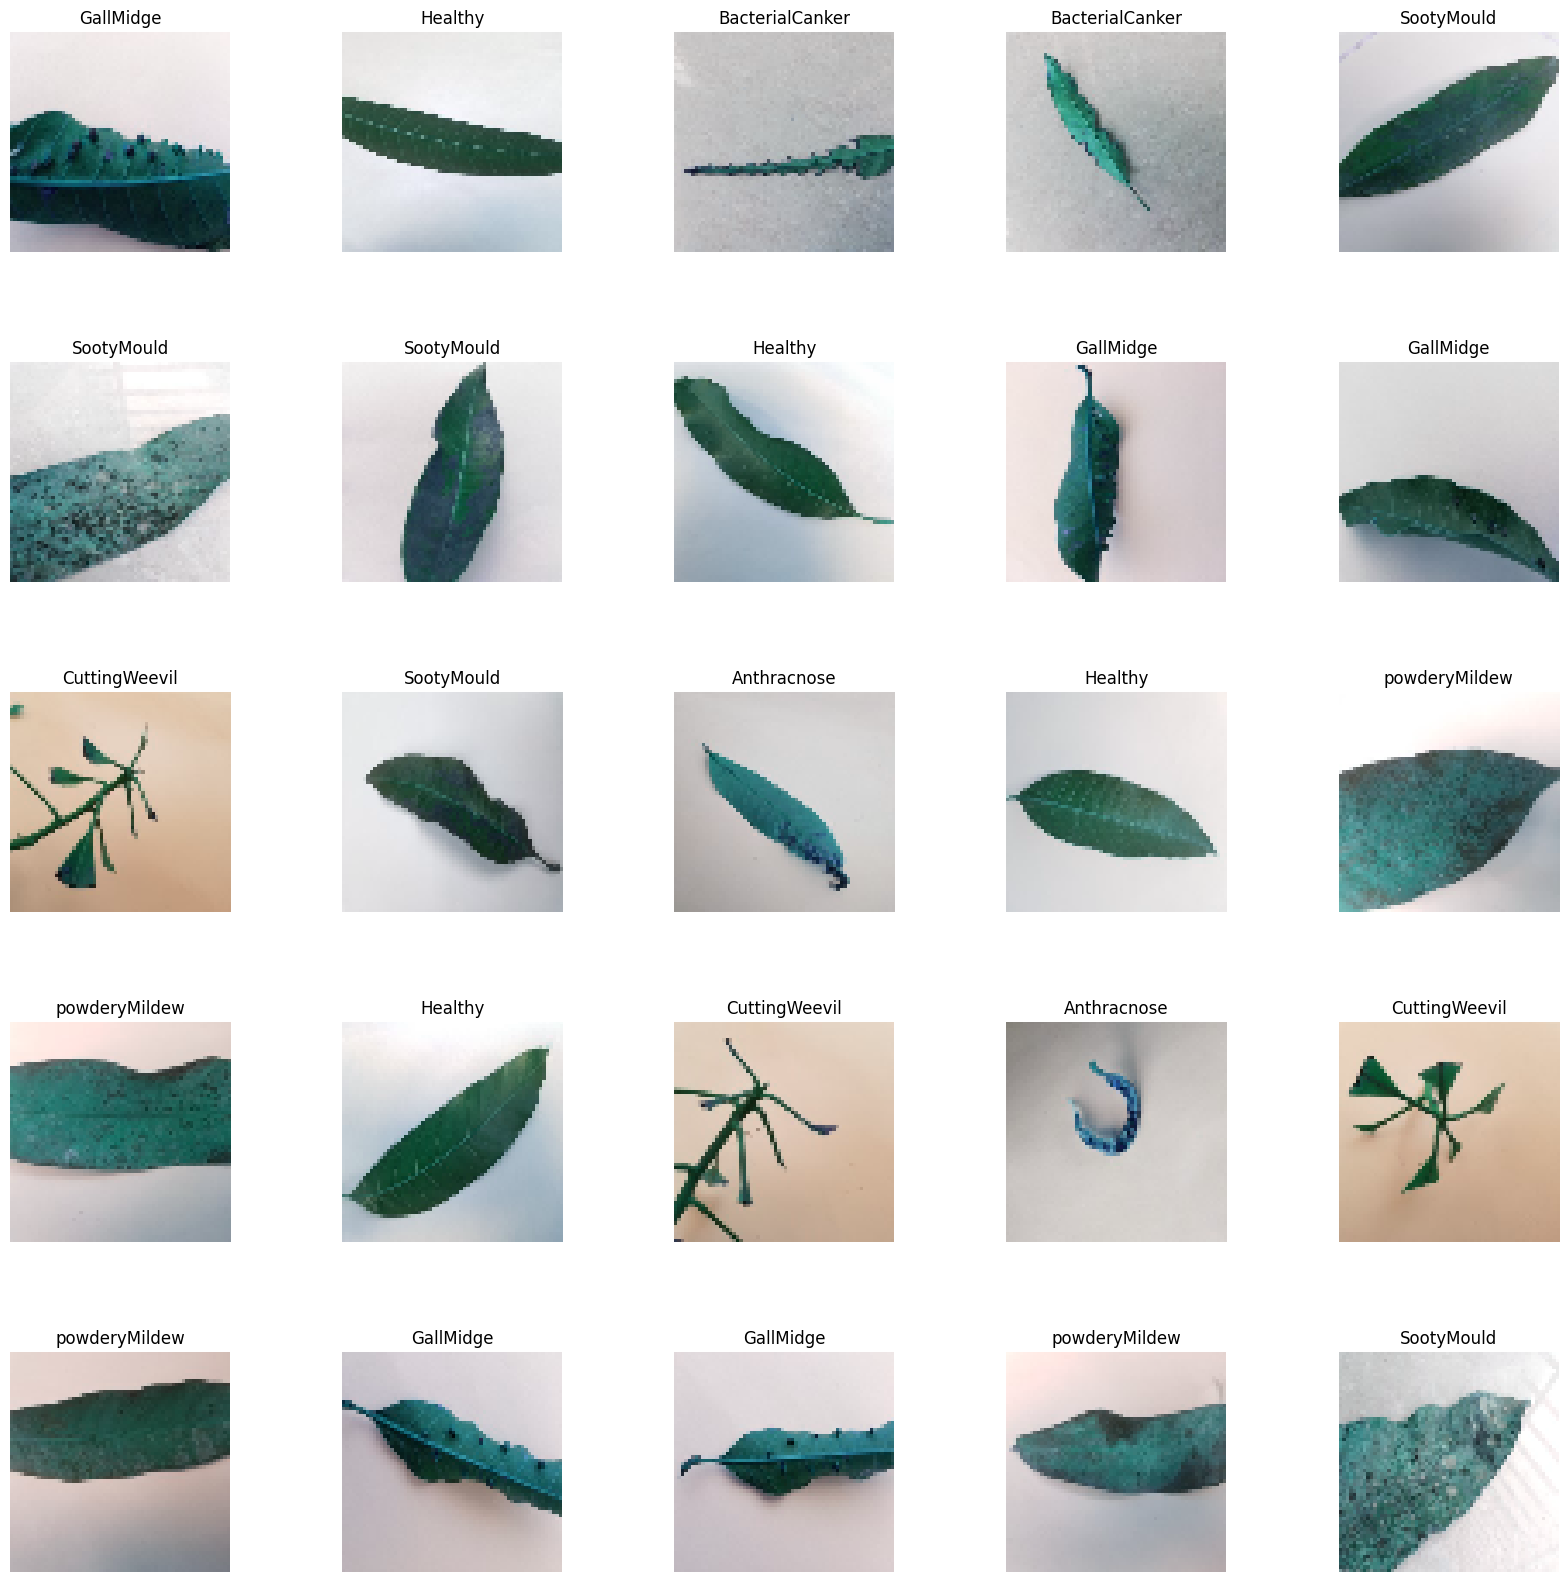

In [12]:
import random
fig,axes=plt.subplots(5,5,figsize=(20,20))
for i in range(5):
    for j in range(5):
        n=random.randint(0,len(A))
        axes[i,j].imshow(x[n])
        axes[i,j].set_title(A[n])
        axes[i,j].axis('off')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(A)
y = to_categorical(y,8)
x = np.array(x)

In [14]:
y=np.array(y)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=42)
x_val, x_test, y_val,y_test = train_test_split(x_test,y_test,test_size=0.5)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("x_val shape: ", x_val.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("y_val shape: ", y_val.shape)

x_train shape:  (2400, 64, 64, 3)
x_test shape:  (800, 64, 64, 3)
x_val shape:  (800, 64, 64, 3)
y_train shape:  (2400, 8)
y_test shape:  (800, 8)
y_val shape:  (800, 8)


In [16]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD

In [17]:
#Model Building
model=Sequential()
model.add(Conv2D(32,(3,3), padding = "Same", activation="elu", input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding = "Same", activation="elu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding  = "Same", activation = "elu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding  = "Same", activation = "elu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), padding  = "Same", activation = "elu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), padding  = "Same", activation = "elu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3), padding  = "Same", activation = "elu"))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), padding  = "Same", activation = "elu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1024, activation="relu"))
model.add(Dense(8, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       2

In [19]:
model.compile(optimizer=SGD(learning_rate=0.0001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [20]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
75/75 [==============================] - 50s 651ms/step - loss: 2.0472 - accuracy: 0.2329 - val_loss: 2.0786 - val_accuracy: 0.1412
Epoch 2/10
75/75 [==============================] - 50s 662ms/step - loss: 1.6325 - accuracy: 0.4033 - val_loss: 1.8641 - val_accuracy: 0.2875
Epoch 3/10
75/75 [==============================] - 48s 635ms/step - loss: 1.4115 - accuracy: 0.5079 - val_loss: 1.5477 - val_accuracy: 0.4387
Epoch 4/10
75/75 [==============================] - 50s 664ms/step - loss: 1.2552 - accuracy: 0.5679 - val_loss: 1.3411 - val_accuracy: 0.5312
Epoch 5/10
75/75 [==============================] - 44s 593ms/step - loss: 1.1491 - accuracy: 0.6196 - val_loss: 1.1984 - val_accuracy: 0.5800
Epoch 6/10
75/75 [==============================] - 44s 586ms/step - loss: 1.0439 - accuracy: 0.6662 - val_loss: 1.0853 - val_accuracy: 0.6538
Epoch 7/10
75/75 [==============================] - 44s 589ms/step - loss: 0.9650 - accuracy: 0.7125 - val_loss: 1.0195 - val_accuracy: 0.6612

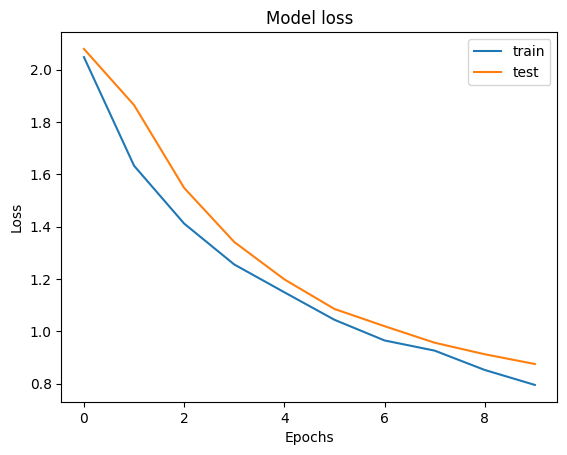

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.show()

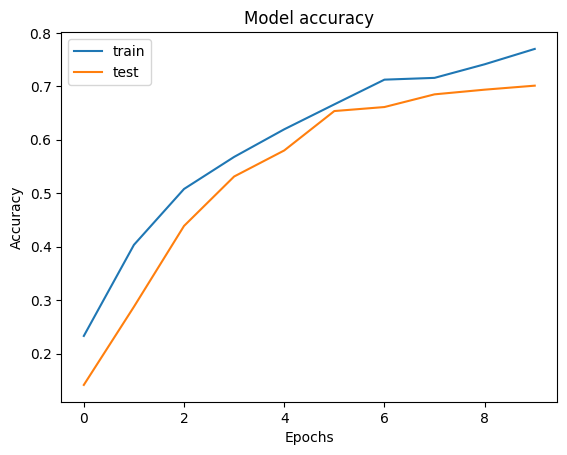

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.show()

In [23]:
y_pred=model.predict(x_test)

25/25 [==============================] - 3s 101ms/step


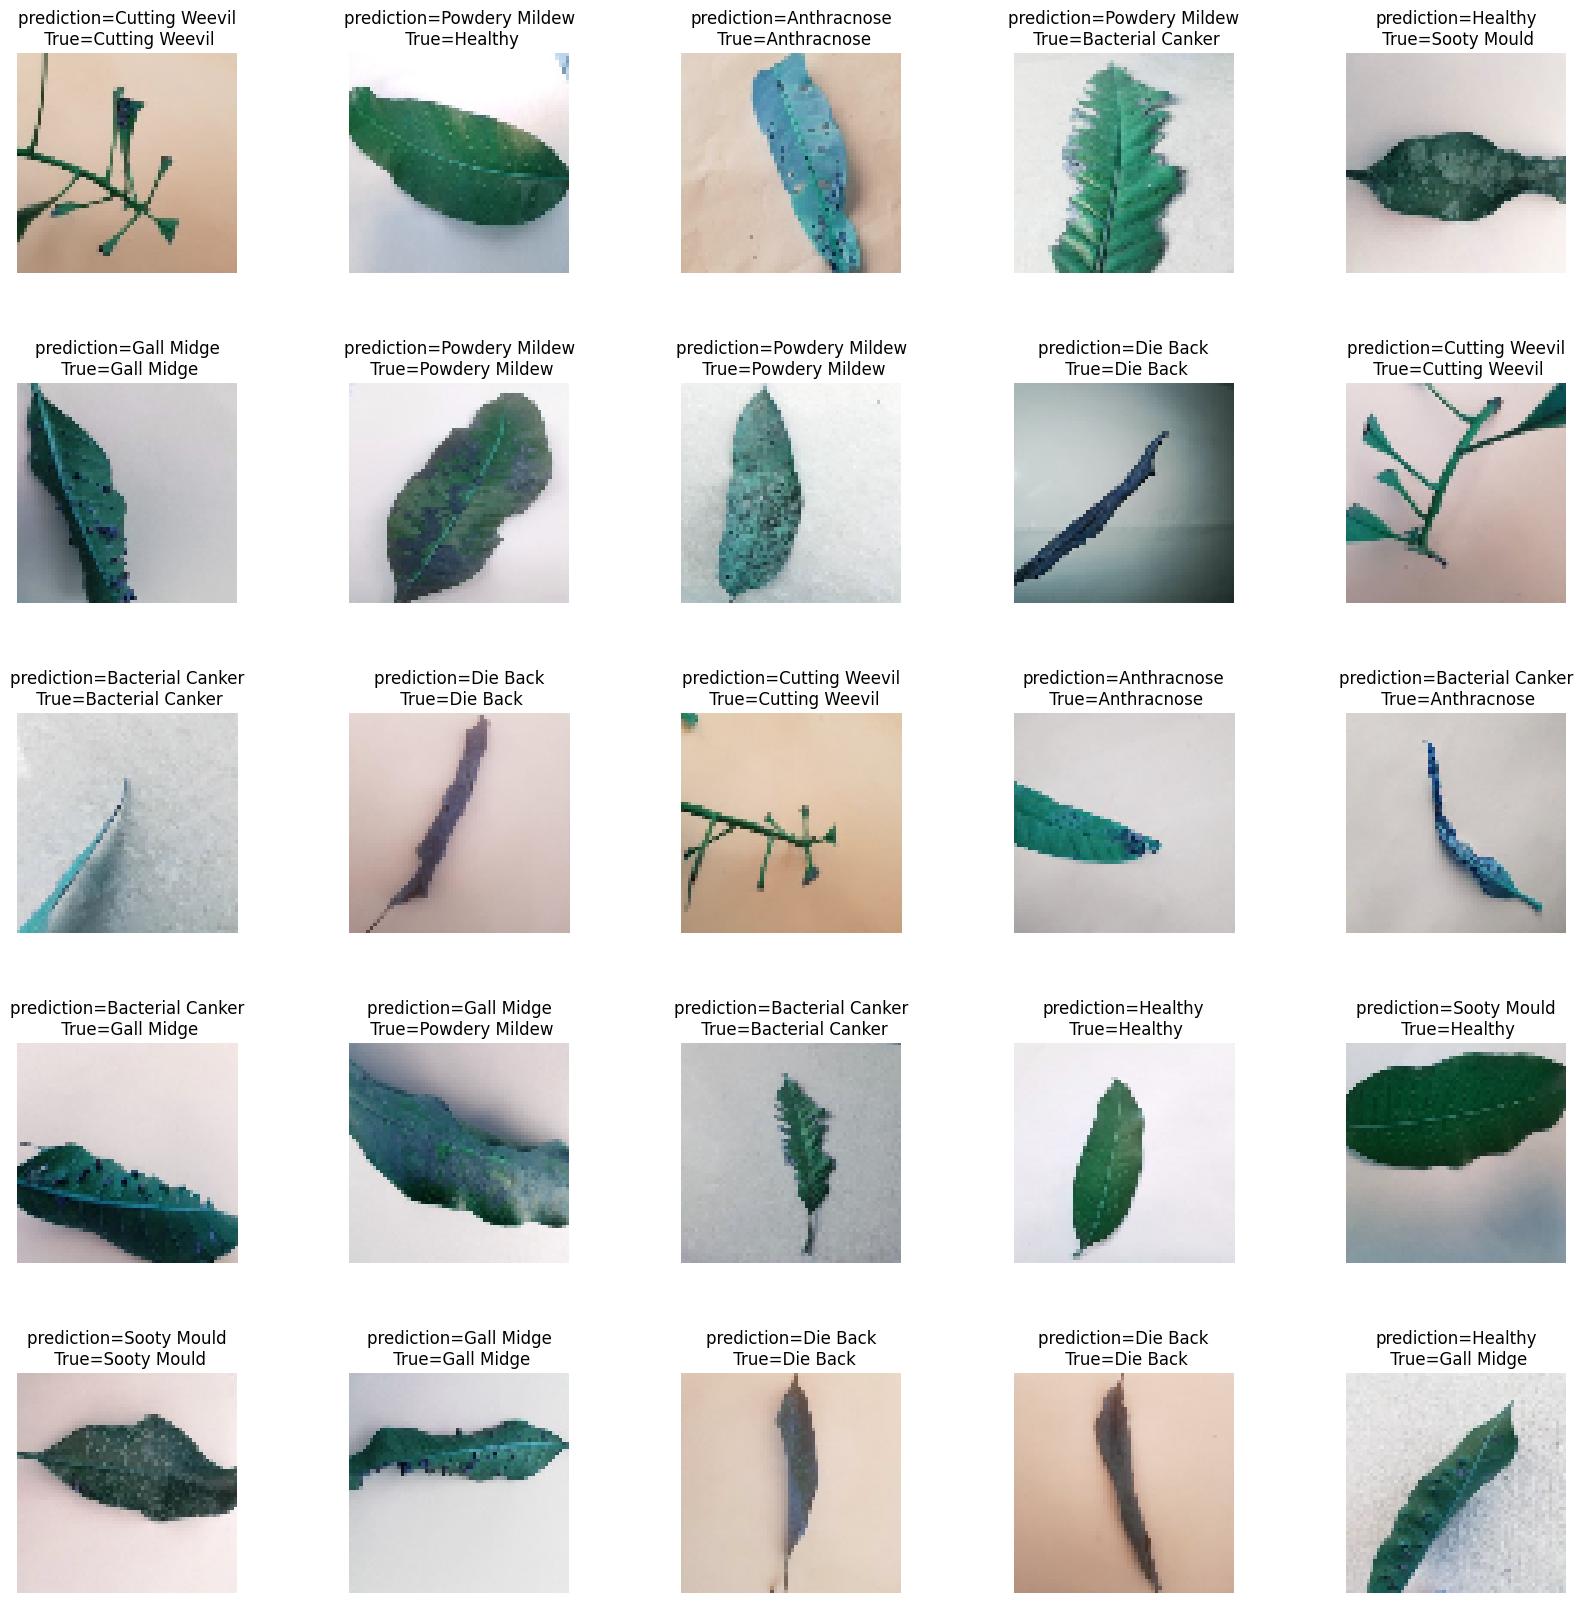

In [24]:
label=os.listdir(data)
fig,axes=plt.subplots(5,5,figsize=(20,20))
for i in range(5):
    for j in range(5):
        n=random.randint(0,len(x_test))
        axes[i,j].imshow(x_test[n])
        axes[i,j].set_title(f'prediction={label[np.argmax(y_pred[n])]}\n True={label[np.argmax(y_test[n])]}')
        axes[i,j].axis('off')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [34]:
#Model Tuning
model=Sequential()
model.add(Conv2D(32,(3,3), padding = "Same", activation="elu", input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding = "Same", activation="elu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding  = "Same", activation = "elu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding  = "Same", activation = "elu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), padding  = "Same", activation = "elu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation="elu"))
model.add(BatchNormalization())
model.add(Dense(1024, activation="elu"))
model.add(Dense(8, activation="softmax"))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 64)      

In [36]:
model.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics = ["accuracy"])

In [37]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
75/75 [==============================] - 45s 569ms/step - loss: 7.2010 - accuracy: 0.4508 - val_loss: 5068.8325 - val_accuracy: 0.1275
Epoch 2/10
75/75 [==============================] - 44s 582ms/step - loss: 3.3117 - accuracy: 0.5283 - val_loss: 64.1253 - val_accuracy: 0.2512
Epoch 3/10
75/75 [==============================] - 42s 556ms/step - loss: 1.1824 - accuracy: 0.6971 - val_loss: 7.3031 - val_accuracy: 0.3875
Epoch 4/10
75/75 [==============================] - 40s 536ms/step - loss: 1.0484 - accuracy: 0.7404 - val_loss: 5.0765 - val_accuracy: 0.3800
Epoch 5/10
75/75 [==============================] - 39s 527ms/step - loss: 0.9789 - accuracy: 0.7700 - val_loss: 6.0238 - val_accuracy: 0.4400
Epoch 6/10
75/75 [==============================] - 40s 528ms/step - loss: 0.7869 - accuracy: 0.8104 - val_loss: 1.7383 - val_accuracy: 0.6637
Epoch 7/10
75/75 [==============================] - 40s 532ms/step - loss: 0.7969 - accuracy: 0.8242 - val_loss: 2.9414 - val_accuracy: 0.

In [38]:
y_pred=model.predict(x_test)

25/25 [==============================] - 2s 89ms/step


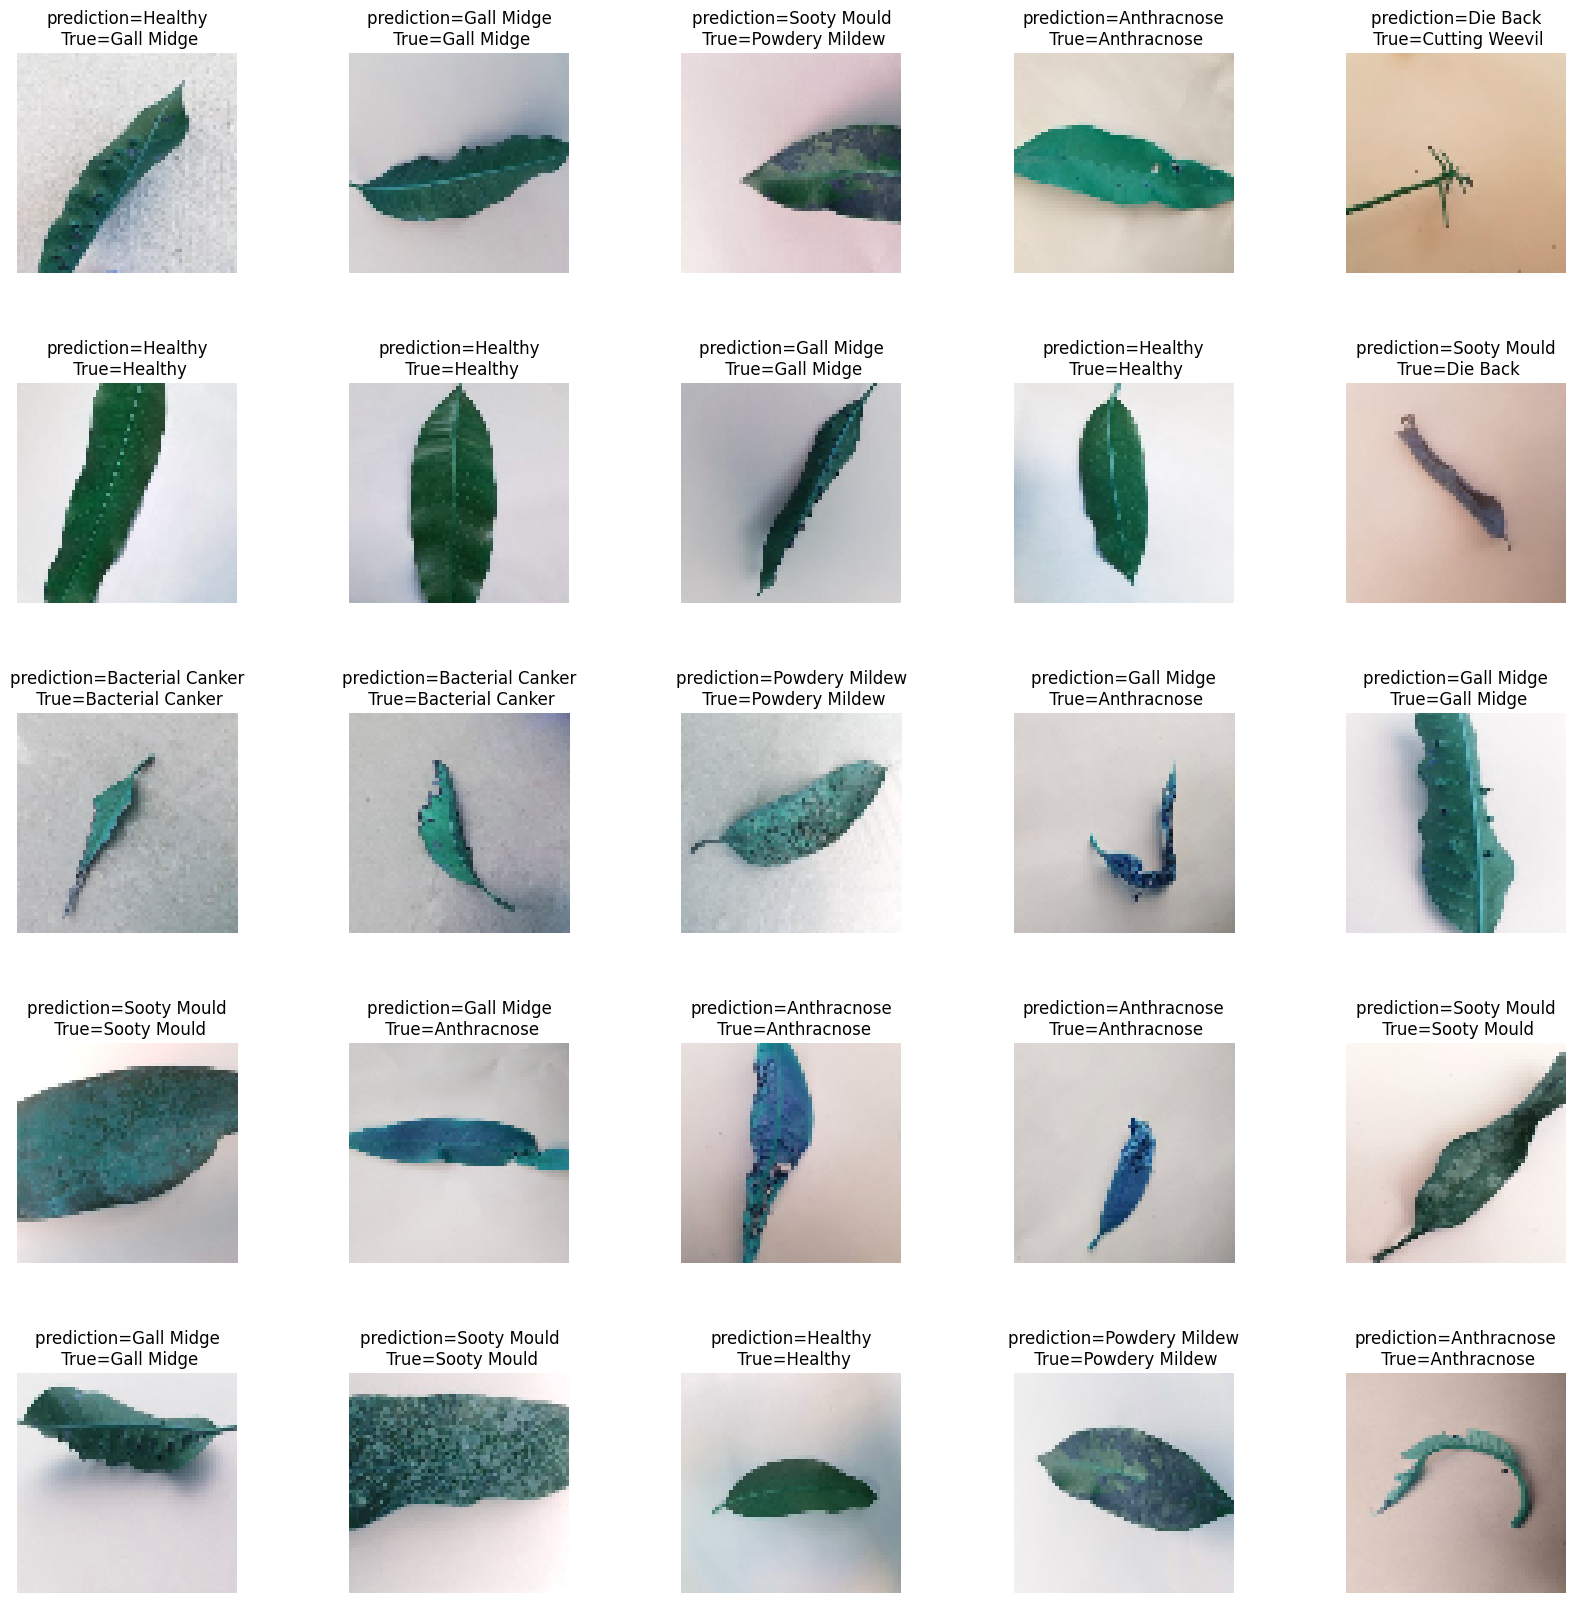

In [39]:
label=os.listdir(data)
fig,axes=plt.subplots(5,5,figsize=(20,20))
for i in range(5):
    for j in range(5):
        n=random.randint(0,len(x_test))
        axes[i,j].imshow(x_test[n])
        axes[i,j].set_title(f'prediction={label[np.argmax(y_pred[n])]}\n True={label[np.argmax(y_test[n])]}')
        axes[i,j].axis('off')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

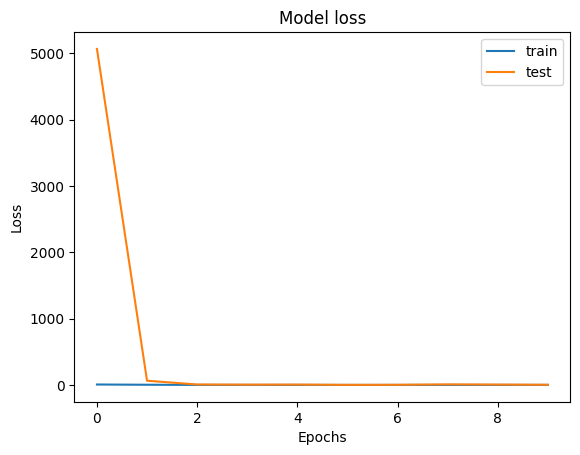

In [40]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.show()

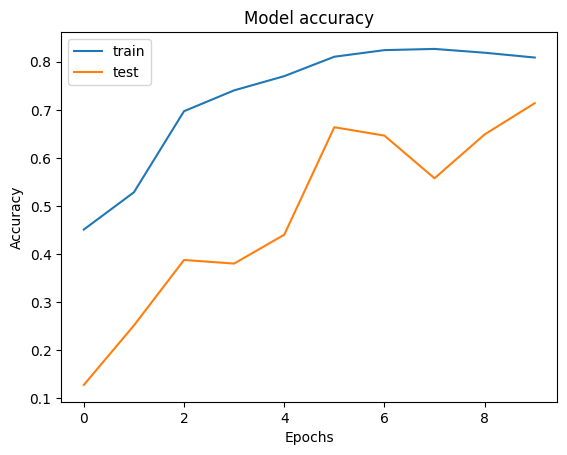

In [41]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.show() 

In [25]:
#model Tunning 
model=Sequential()
model.add(Conv2D(32,(3,3), padding = "Same", activation="relu", input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding = "Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding  = "Same", activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,(3,3), padding  = "Same", activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(96,(3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,(3,3), padding  = "Same", activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(96,(3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1024, activation="relu"))
model.add(Dense(8, activation="softmax"))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)      

In [27]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [28]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
75/75 [==============================] - 35s 443ms/step - loss: 0.9382 - accuracy: 0.7050 - val_loss: 12.6379 - val_accuracy: 0.1725
Epoch 2/10
75/75 [==============================] - 35s 466ms/step - loss: 0.4240 - accuracy: 0.8521 - val_loss: 3.2190 - val_accuracy: 0.4638
Epoch 3/10
75/75 [==============================] - 34s 457ms/step - loss: 0.3185 - accuracy: 0.8908 - val_loss: 2.5622 - val_accuracy: 0.7100
Epoch 4/10
75/75 [==============================] - 35s 468ms/step - loss: 0.3715 - accuracy: 0.8925 - val_loss: 14.5099 - val_accuracy: 0.2875
Epoch 5/10
75/75 [==============================] - 34s 456ms/step - loss: 0.3149 - accuracy: 0.9008 - val_loss: 1.7860 - val_accuracy: 0.6350
Epoch 6/10
75/75 [==============================] - 35s 463ms/step - loss: 0.2199 - accuracy: 0.9296 - val_loss: 1.1999 - val_accuracy: 0.7312
Epoch 7/10
75/75 [==============================] - 36s 474ms/step - loss: 0.1604 - accuracy: 0.9388 - val_loss: 1.3219 - val_accuracy: 0.69

In [29]:
y_pred=model.predict(x_test)

25/25 [==============================] - 2s 87ms/step


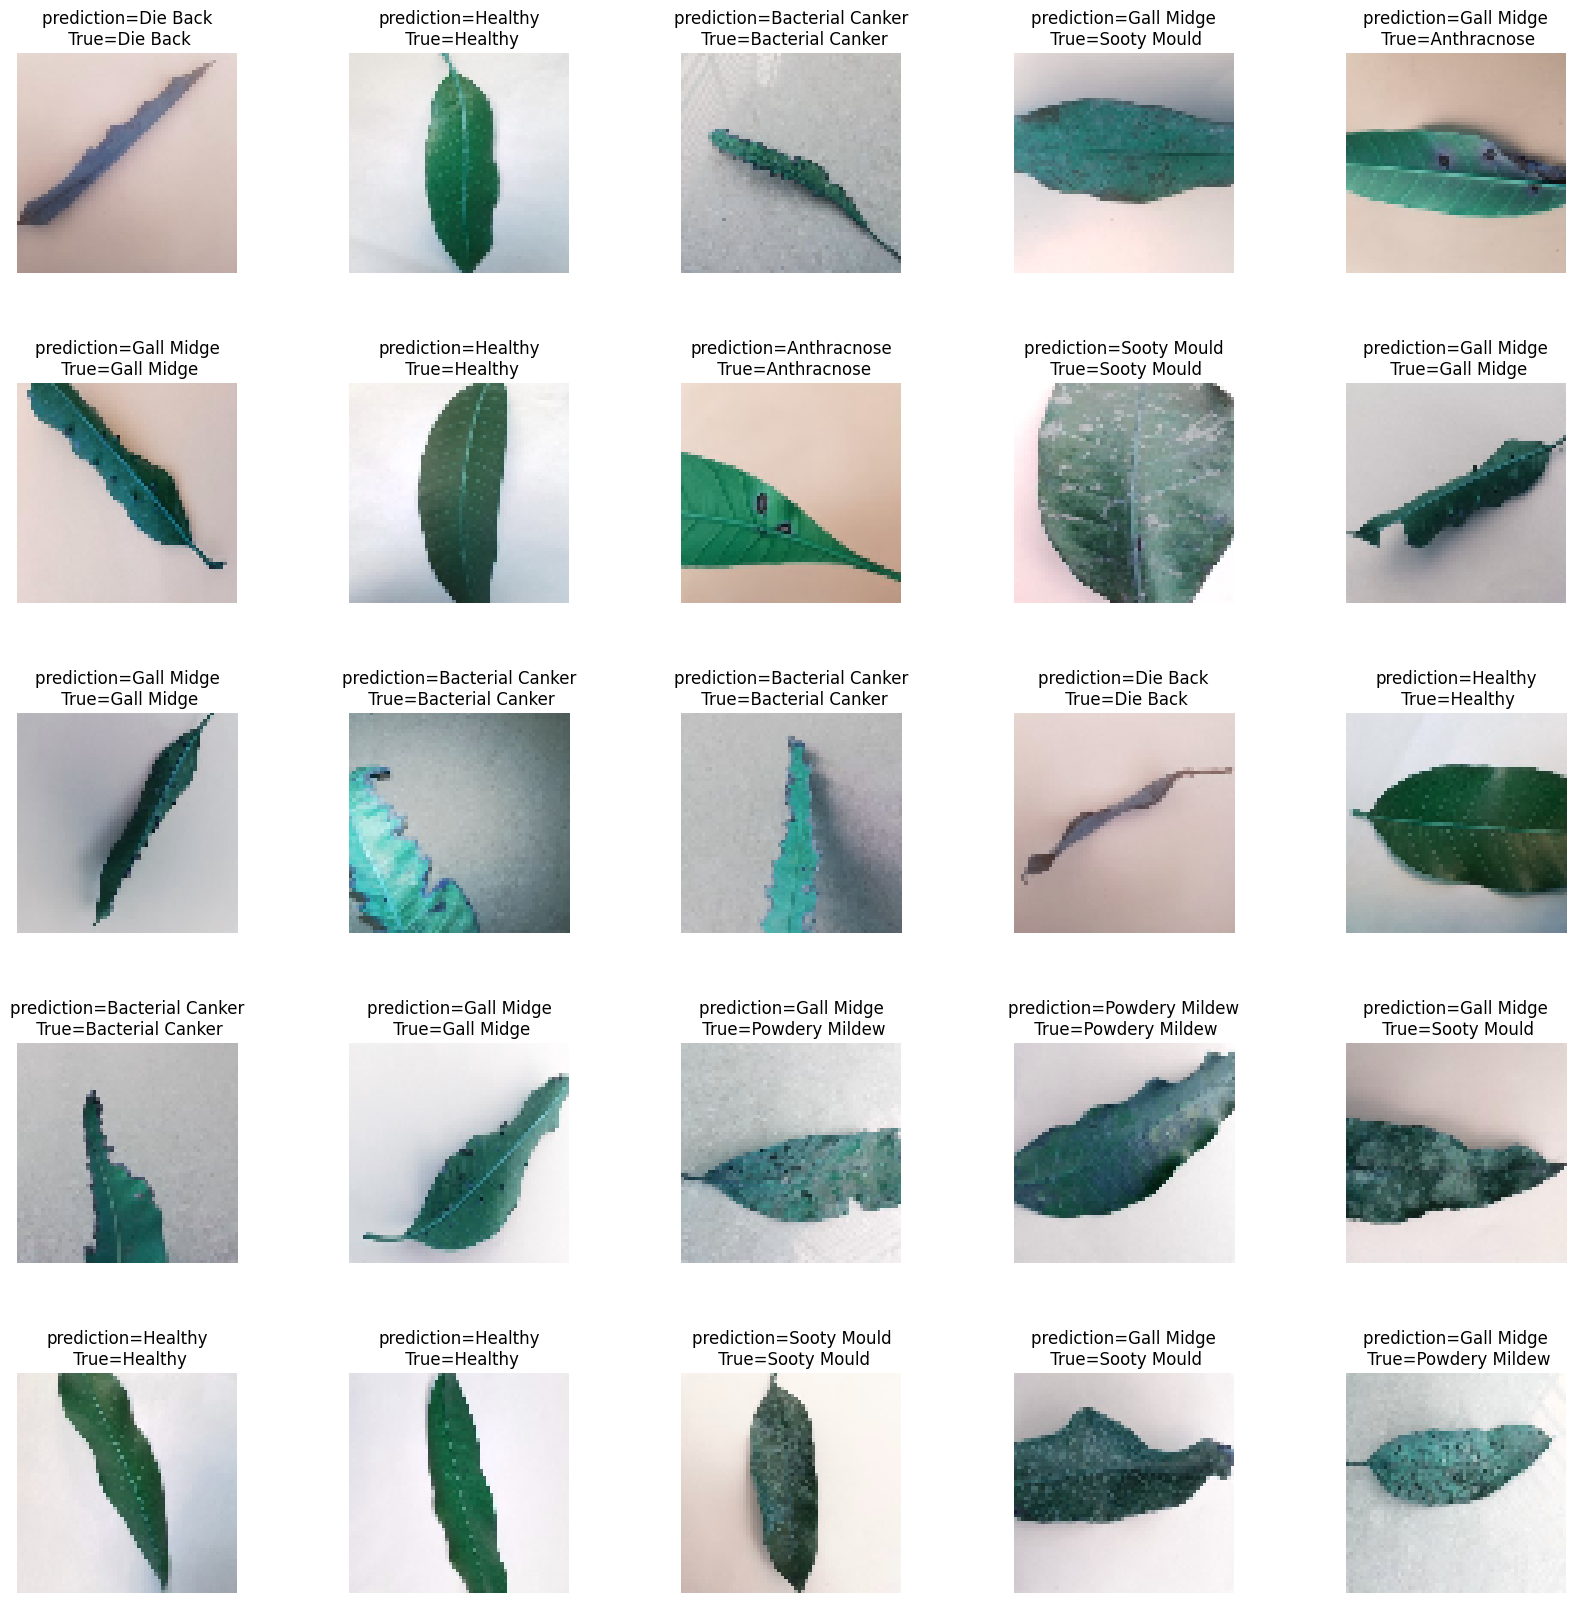

In [30]:
label=os.listdir(data)
fig,axes=plt.subplots(5,5,figsize=(20,20))
for i in range(5):
    for j in range(5):
        n=random.randint(0,len(x_test))
        axes[i,j].imshow(x_test[n])
        axes[i,j].set_title(f'prediction={label[np.argmax(y_pred[n])]}\n True={label[np.argmax(y_test[n])]}')
        axes[i,j].axis('off')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

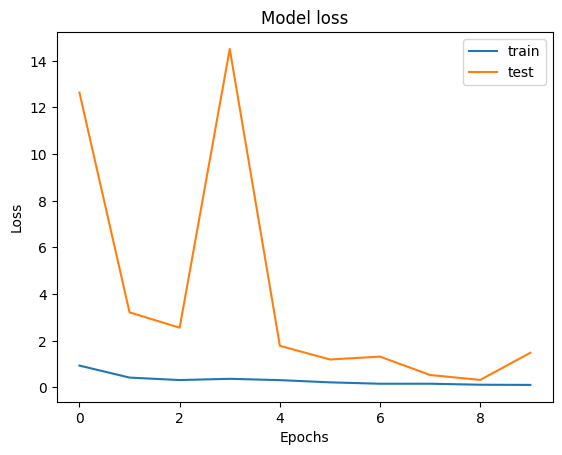

In [31]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.show()

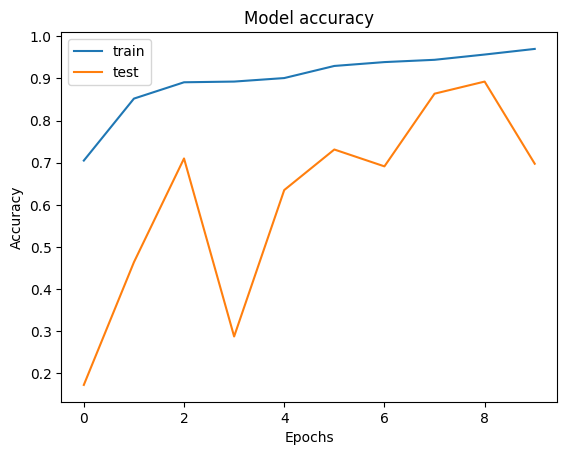

In [32]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.show()